In [40]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
print(data.shape)
data.head(5)

(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [41]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [42]:
for column in data.select_dtypes(object).columns:
    print('-----' + str(column)+'-----')
    print(data[column].value_counts())
    print()
    

-----date-----
3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64

-----quarter---

In [64]:
from sklearn.model_selection import ShuffleSplit
split=ShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(data):
    train_set=data.loc[train_index]
    test_set=data.loc[test_index]
print(train_set.shape, test_set.shape)

(897, 15) (300, 15)


In [53]:
train_set.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,897.000000,897.000000,897.000000,504.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,6.337793,0.727893,14.771338,1204.063492,4454.983278,40.724638,0.232441,0.362319,0.147157,33.758640,0.733990
std,3.487005,0.101833,10.974161,1981.747429,3331.283876,181.494579,5.041434,3.170604,0.418030,22.250702,0.176655
min,1.000000,0.070000,2.900000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,775.250000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.649981
50%,6.000000,0.750000,14.890000,1025.000000,3780.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.782448
75%,9.000000,0.800000,23.690000,1250.250000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850313
max,12.000000,0.800000,51.020000,23122.000000,25920.000000,3600.000000,150.000000,40.000000,2.000000,60.000000,1.120437


In [54]:
test_set.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,300.000000,300.000000,300.000000,187.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,6.693333,0.734833,15.931767,1153.818182,4903.766667,30.693333,2.218333,0.390000,0.160000,37.155000,0.738382
std,3.385878,0.084965,10.821730,1379.220728,3384.051120,62.028847,23.812250,3.552459,0.456539,21.878086,0.168087
min,1.000000,0.350000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.238042
25%,4.000000,0.700000,4.080000,772.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.664583
50%,7.000000,0.750000,18.790000,1083.000000,4410.000000,23.000000,0.000000,0.000000,0.000000,50.500000,0.757087
75%,10.000000,0.800000,24.260000,1258.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850137
max,12.000000,0.800000,54.560000,16882.000000,15120.000000,960.000000,300.000000,45.000000,2.000000,89.000000,1.096633


-----date-----


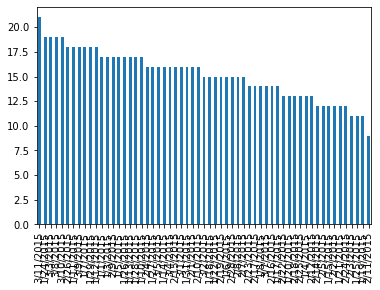

-----quarter-----


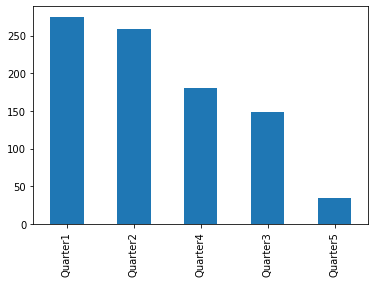

-----department-----


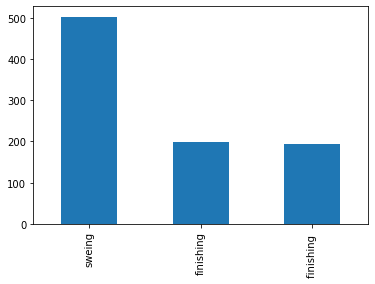

-----day-----


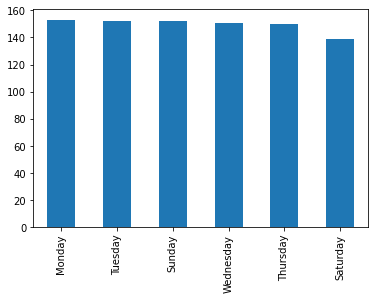

In [63]:
from matplotlib import pyplot as plt
for column in train_set.select_dtypes(object).columns:
    print('-----' + str(column)+ "-----")
    train_set[column].value_counts().plot.bar()
    plt.show()

-----date------


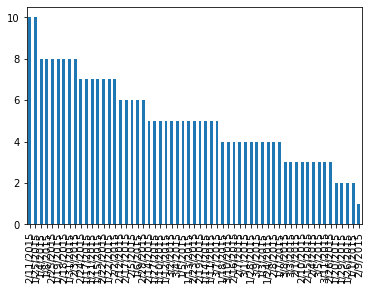

-----quarter------


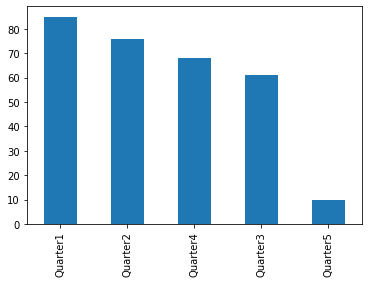

-----department------


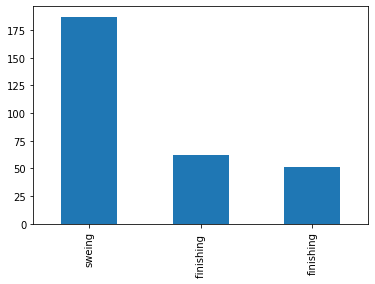

-----day------


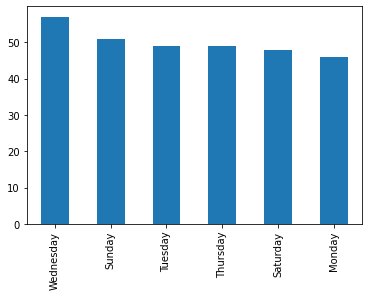

In [56]:
for column in test_set.select_dtypes(object).columns:
    print('-----' + str(column)+ '------')
    test_set[column].value_counts().plot.bar()
    plt.show()

In [57]:
train_set.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,897.000000,897.000000,897.000000,504.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,6.337793,0.727893,14.771338,1204.063492,4454.983278,40.724638,0.232441,0.362319,0.147157,33.758640,0.733990
std,3.487005,0.101833,10.974161,1981.747429,3331.283876,181.494579,5.041434,3.170604,0.418030,22.250702,0.176655
min,1.000000,0.070000,2.900000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,775.250000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.649981
50%,6.000000,0.750000,14.890000,1025.000000,3780.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.782448
75%,9.000000,0.800000,23.690000,1250.250000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850313
max,12.000000,0.800000,51.020000,23122.000000,25920.000000,3600.000000,150.000000,40.000000,2.000000,60.000000,1.120437


In [58]:
from sklearn.preprocessing import StandardScaler
train_set_stdz=StandardScaler().fit_transform(train_set.select_dtypes('number'))

In [59]:
train_set.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,897.000000,897.000000,897.000000,504.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,6.337793,0.727893,14.771338,1204.063492,4454.983278,40.724638,0.232441,0.362319,0.147157,33.758640,0.733990
std,3.487005,0.101833,10.974161,1981.747429,3331.283876,181.494579,5.041434,3.170604,0.418030,22.250702,0.176655
min,1.000000,0.070000,2.900000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,775.250000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.649981
50%,6.000000,0.750000,14.890000,1025.000000,3780.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.782448
75%,9.000000,0.800000,23.690000,1250.250000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850313
max,12.000000,0.800000,51.020000,23122.000000,25920.000000,3600.000000,150.000000,40.000000,2.000000,60.000000,1.120437


In [65]:
pd.DataFrame(train_set_stdz).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.970000e+02,8.970000e+02,8.970000e+02,5.040000e+02,8.970000e+02,8.970000e+02,8.970000e+02,8.970000e+02,8.970000e+02,8.970000e+02,8.970000e+02
mean,4.282466e-17,-6.014636e-16,7.550012e-17,3.689729e-17,5.223123e-17,-1.646769e-16,2.544648e-16,-1.304852e-16,5.534406e-16,-1.812003e-16,4.228007e-16
std,1.000558e+00,1.000558e+00,1.000558e+00,1.000994e+00,1.000558e+00,1.000558e+00,1.000558e+00,1.000558e+00,1.000558e+00,1.000558e+00,1.000558e+00
min,-1.531621e+00,-6.464101e+00,-1.082357e+00,-6.031293e-01,-1.338063e+00,-2.245101e-01,-4.613194e-02,-1.143381e-01,-3.522217e-01,-1.428106e+00,-2.833573e+00
25%,-9.577429e-01,-2.740613e-01,-9.875361e-01,-2.165965e-01,-9.055564e-01,-2.245101e-01,-4.613194e-02,-1.143381e-01,-3.522217e-01,-1.113334e+00,-4.758251e-01
50%,-9.692589e-02,2.172117e-01,1.081890e-02,-9.044614e-02,-2.027326e-01,-2.245101e-01,-4.613194e-02,-1.143381e-01,-3.522217e-01,1.085335e-02,2.744590e-01
75%,7.638912e-01,7.084847e-01,8.131499e-01,2.332911e-02,7.343657e-01,5.113396e-02,-4.613194e-02,-1.143381e-01,-3.522217e-01,1.045105e+00,6.588395e-01
max,1.624708e+00,7.084847e-01,3.304934e+00,1.107089e+01,6.447061e+00,1.962186e+01,2.972391e+01,1.250859e+01,4.434792e+00,1.180008e+00,2.188804e+00


In [66]:
data_wo_na=data.dropna()
data_wo_na

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [70]:
data_imputed=data
data_imputed.loc[:, data.dtypes == object] = data.select_dtypes(object).fillna('missing')
for column in data_imputed.select_dtypes(object).columns:
    print('-----' + str(column)+'-----')
    print(data_imputed[column].value_counts())
    print()

-----date-----
3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64

-----quarter---

In [71]:
import numpy as np
data_imputed.loc[:, data.dtypes ==np.number]=data.select_dtypes('number').fillna(data.median())
data_imputed.describe()

/var/folders/yc/04x2gkxd0c7fzsxc0zsbcdx40000gn/T/ipykernel_64744/1480034408.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_imputed.loc[:, data.dtypes ==np.number]=data.select_dtypes('number').fillna(data.median())


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1126.437761,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1397.653191,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [72]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
data_class_code = onehot.fit_transform(data_imputed.select_dtypes(object))
print(data_class_code)

[[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [119]:
# import the libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
X=data[['actual_productivity']]
y=data['actual_productivity'].astype('int')
X=preprocessing.StandardScaler().fit(X).transform(X)
sss=StratifiedShuffleSplit(n_splits=14, test_size=.25, random_state=1)
sss.get_n_splits(X,y)

14

In [120]:
scores = []

rf = RandomForestClassifier(n_estimators=40, max_depth=7)
for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	rf.fit(X_train, y_train)
	pred = rf.predict(X_test)
	scores.append(accuracy_score(y_test, pred))


print(scores)



[1.0, 1.0, 0.9933333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9833333333333333, 1.0, 1.0, 1.0, 1.0]


In [10]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
print(data.shape)
data.head()

from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=1, random_state=2)

for train_index, test_index in split.split(data, data['actual_productivity']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]
    


(1197, 15)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [125]:
trainX=strat_train_set.loc[:,:13]
trainY=strat_train_set.loc[:,14]
trainX.shape, trainY.shape

NameError: name 'strat_train_set' is not defined

In [126]:
from matplotlib import pyplot as plt
trainX.hist(bins=20,figsize=(15,10))
plt.show()

NameError: name 'trainX' is not defined

In [80]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
print(data.shape)
data.head(5)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])
from sklearn.preprocessing import OneHotEncoder
cat_cols=trainX.columns[trainX.dtypes==object]
cat_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encode', OneHotEncoder())
])

(1197, 15)


NameError: name 'trainX' is not defined

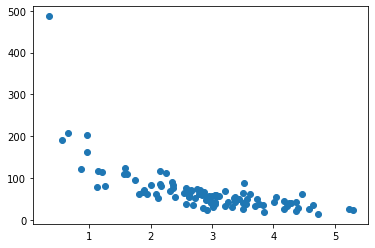

In [102]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

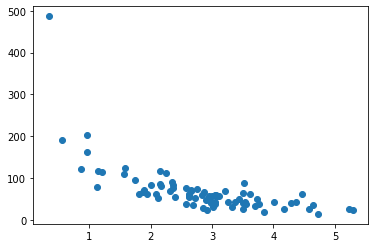

In [103]:
plt.scatter(train_x, train_y)
plt.show()

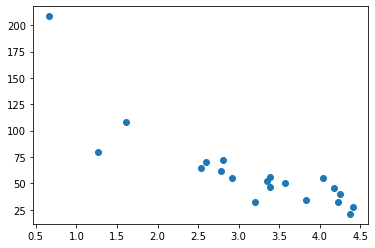

In [104]:
plt.scatter(test_x, test_y)
plt.show()

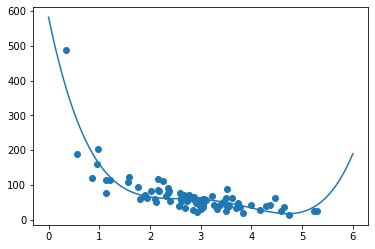

In [105]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [2]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
print(data.shape)
data.head()
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()


(1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
921,2/24/2015,Quarter4,sweing,Tuesday,1,0.6,22.53,708.0,5040,0,0.0,0,1,42.0,0.268214
321,1/19/2015,Quarter3,sweing,Monday,6,0.8,11.41,1028.0,4380,50,0.0,0,0,31.0,0.800359
101,1/6/2015,Quarter1,finishing,Tuesday,8,0.8,2.90,NaN,1440,0,0.0,0,0,8.0,0.681061
920,2/24/2015,Quarter4,finishing,Tuesday,2,0.7,3.90,NaN,960,0,0.0,0,0,8.0,0.325000
58,1/4/2015,Quarter1,finishing,Sunday,7,0.8,2.90,NaN,960,0,0.0,0,0,8.0,0.667604


<AxesSubplot:>

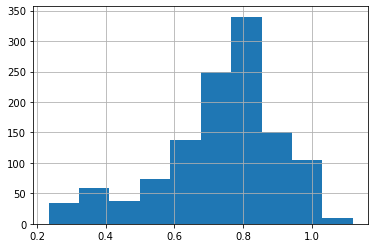

In [3]:
data['actual_productivity'].hist()

In [10]:
from sklearn.model_selection import ShuffleSplit
elements=list(range(10))
rs=ShuffleSplit(n_splits=5, train_size=0.8)
for train_data, test_data in rs.split(elements):
    print('Train: {} Test: {}'.format(train_data, test_data))
            

Train: [0 6 9 8 4 2 1 7] Test: [3 5]
Train: [0 1 8 4 7 6 3 9] Test: [2 5]
Train: [1 7 6 0 2 3 9 8] Test: [5 4]
Train: [8 0 1 2 5 9 3 4] Test: [6 7]
Train: [6 5 2 9 3 0 4 1] Test: [7 8]


In [14]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data) + test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), 'train+', len(test_set), 'test')
    

0 train+ 1197 test


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='actual_productivity')),
    ('std_scaler', StandardScaler()),
])


In [18]:
data_num_tr=num_pipeline.fit_transform(data_num)
data_num_tr

NameError: name 'data_num' is not defined